## 1. Load data

In [1]:
from os import getcwd ,chdir

from pandas import DataFrame

from utils import load_binary_data, expand_label_cols

chdir('/app')

In [2]:
data: DataFrame = load_binary_data('new_df.pickle')
labels: DataFrame = load_binary_data('target.pickle')

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


## 2. Postprocess data

In [3]:
print(data.columns)
print(labels.columns)

Index(['spot', 'patient2', 'a01', 'a02', 'a05', 'a06', 'a08', 'a09', 'a10',
       'a11',
       ...
       'b31_0.0', 'b31_1.0', 'b31_2.0', 'b31_3.0', 'b31_4.0', 'b31_5.0',
       'c02_1.0', 'c02_2.0', 'c02_3.0', 'c02_9.0'],
      dtype='object', length=121)
Index(['E2H', 'E2R', 'E2S', 'E2E', 'E2O', 'E2K', 'ny'], dtype='object')


In [4]:
labels['count']=labels['E2H']+labels['E2R']+labels['E2S']+labels['E2E']+labels['E2O']+labels['E2K']
labels['count'].value_counts()

count
0    1064
1     245
2     103
3      53
4      34
5      15
6      12
Name: count, dtype: int64

In [5]:
expand_label_cols(labels)

serious
False    1309
True      217
Name: count, dtype: int64
morethan3
False    1412
True      114
Name: count, dtype: int64


## 3. Visualization

In [6]:
from sklearn.manifold import TSNE
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import Isomap
from sklearn.decomposition import PCA
import umap
import matplotlib.pyplot as plt
import numpy as np

/p_3_10/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/p_3_10/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/p_3_10/lib/python3.10/site-packages/umap/distances.py:1086: NumbaDeprecationWarning: The 'nopython' keyword argument was no

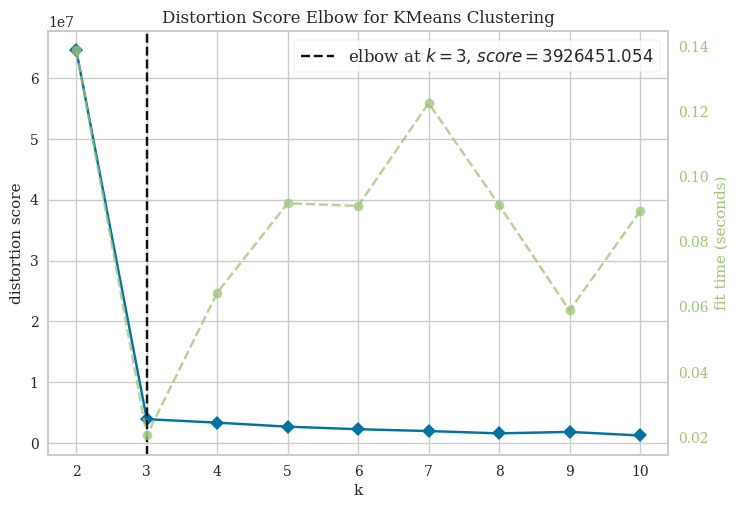

In [16]:
from importlib import import_module, reload
visualiztion = import_module("visualization")
reload(visualiztion)
# from visualization import Ploter

ploter = visualiztion.Ploter()
ploter.plot_KELbow(data)

In [18]:
from sklearn.cluster import DBSCAN
data_dbscan_clusted = DBSCAN(eps=0.00001, min_samples=3).fit(data)
data['db']=data_dbscan_clusted.labels_


In [19]:
data['db'].value_counts()

db
-1    1526
Name: count, dtype: int64

### fitting data

In [40]:
learning = import_module("learning")
reload(learning)

learner = learning.Learner()

t_sne_data = learner.tsne(data, n_components=2, perplexity=100)

kmeans = learner.kmeans(data, n_clusters=3, random_state=0)
cluster=kmeans.labels_
print(cluster)


/p_3_10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[1 1 1 ... 1 0 0]


### plotting

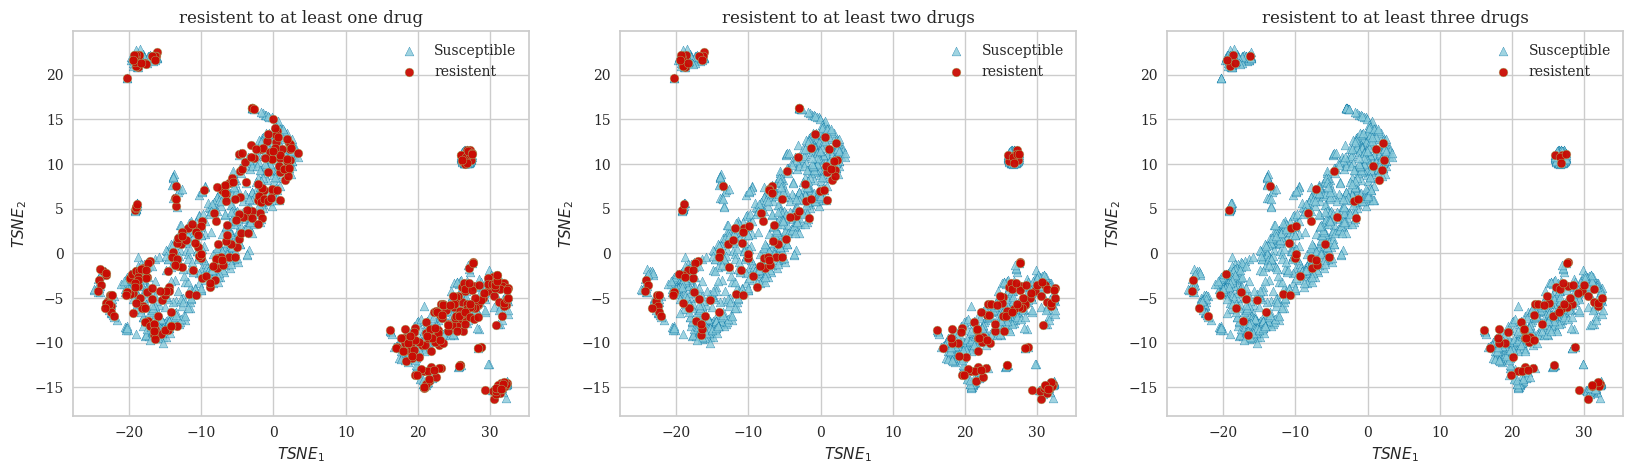

In [43]:
reload(visualiztion)
ploter = visualiztion.Ploter()

ploter.plot_tsne(t_sne_data, labels)

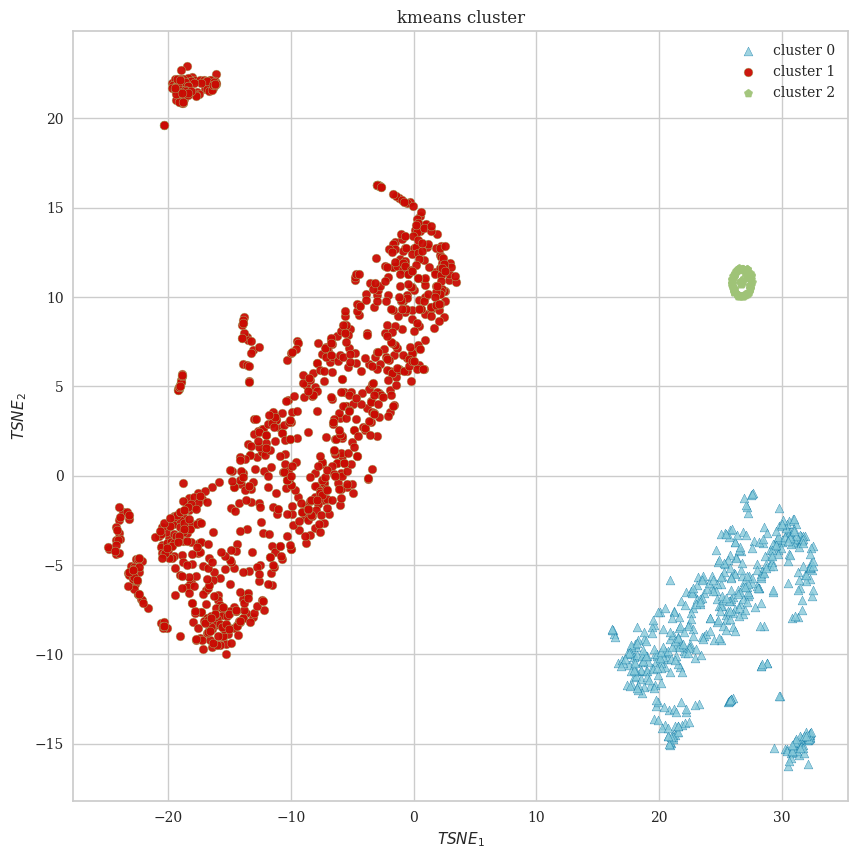

In [44]:

ploter.plot_Kmeans_on_tsne_data(t_sne_data, cluster)

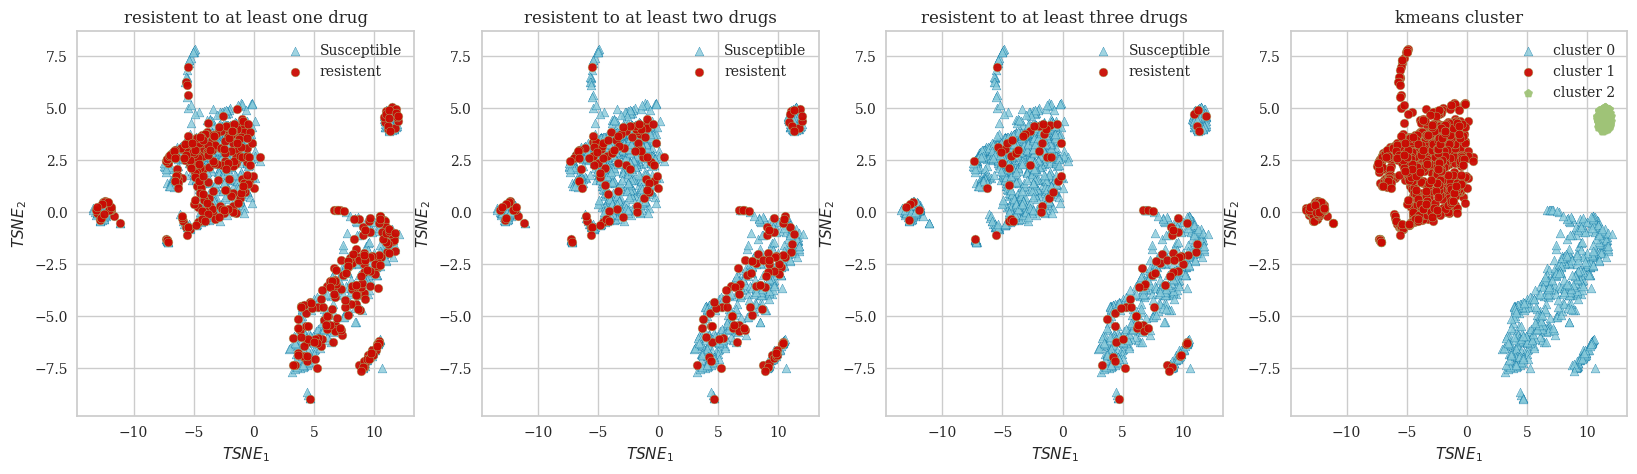

In [29]:
fig = plt.figure(figsize=(20,5))
ax1,ax2,ax3,ax4 = fig.subplots(1,4)
ax1.scatter(newData[labels['ny']==0,0], newData[labels['ny']==0,1], label='Susceptible',
marker='^', color='c', edgecolors='b', alpha=0.80, s=40,)
ax1.scatter(newData[labels['ny']==1,0], newData[labels['ny']==1,1], label='resistent',
marker='o', color='r', edgecolors='g',alpha=0.95, s=40)
ax1.set_xlabel('$TSNE_{1}$')
ax1.set_ylabel('$TSNE_{2}$')

ax1.set_title('resistent to at least one drug')

ax2.scatter(newData[labels['serious']==0,0], newData[labels['serious']==0,1], label='Susceptible',
marker='^', color='c', edgecolors='b', alpha=0.80, s=40,)
ax2.scatter(newData[labels['serious']==1,0], newData[labels['serious']==1,1], label='resistent',
marker='o', color='r', edgecolors='g',alpha=0.95, s=40)
ax2.set_xlabel('$TSNE_{1}$')
ax2.set_ylabel('$TSNE_{2}$')

ax2.set_title('resistent to at least two drugs')

ax3.scatter(newData[labels['morethan3']==0,0], newData[labels['morethan3']==0,1], label='Susceptible',
marker='^', color='c', edgecolors='b', alpha=0.80, s=40,)
ax3.scatter(newData[labels['morethan3']==1,0], newData[labels['morethan3']==1,1], label='resistent',
marker='o', color='r', edgecolors='g',alpha=0.95, s=40)
ax3.set_xlabel('$TSNE_{1}$')
ax3.set_ylabel('$TSNE_{2}$')

ax3.set_title('resistent to at least three drugs')

ax4.scatter(newData[cluster==0,0], newData[cluster==0,1], label='cluster 0',
marker='^', color='c', edgecolors='b', alpha=0.80, s=40,)
ax4.scatter(newData[cluster==1,0], newData[cluster==1,1], label='cluster 1',
marker='o', color='r', edgecolors='g',alpha=0.95, s=40)
ax4.scatter(newData[cluster==2,0], newData[cluster==2,1], label='cluster 2',
marker='p', color='g', alpha=0.95, s=40)
ax4.set_xlabel('$TSNE_{1}$')
ax4.set_ylabel('$TSNE_{2}$')

ax4.set_title('kmeans cluster')
ax1.grid(True)
ax2.grid(True)
ax3.grid(True)
ax4.grid(True)
ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()

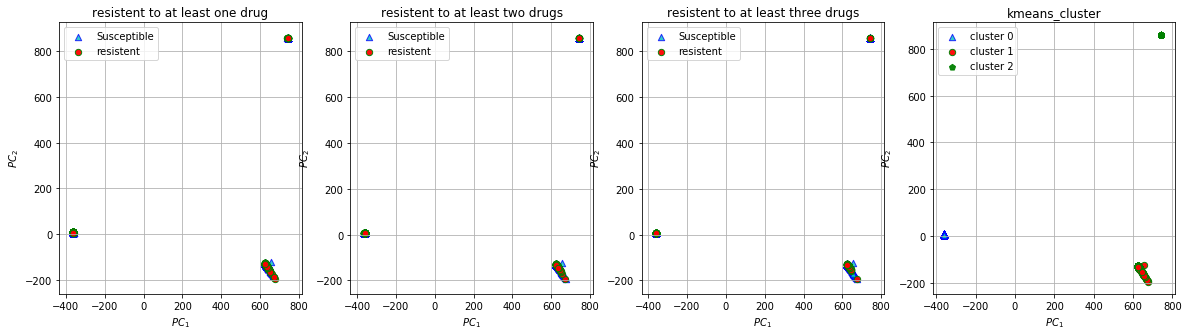

In [20]:

pca=PCA(n_components=2)
newData=pca.fit_transform(new_df)
fig = plt.figure(figsize=(20,5))
ax1,ax2,ax3,ax4 = fig.subplots(1,4)
ax1.scatter(newData[target['ny']==0,0], newData[target['ny']==0,1], label='Susceptible',
marker='^', color='c', edgecolors='b', alpha=0.80, s=40,)
ax1.scatter(newData[target['ny']==1,0], newData[target['ny']==1,1], label='resistent',
marker='o', color='r', edgecolors='g',alpha=0.95, s=40)
ax1.set_xlabel('$PC_{1}$')
ax1.set_ylabel('$PC_{2}$')

ax1.set_title('resistent to at least one drug')

ax2.scatter(newData[target['serious']==0,0], newData[target['serious']==0,1], label='Susceptible',
marker='^', color='c', edgecolors='b', alpha=0.80, s=40,)
ax2.scatter(newData[target['serious']==1,0], newData[target['serious']==1,1], label='resistent',
marker='o', color='r', edgecolors='g',alpha=0.95, s=40)
ax2.set_xlabel('$PC_{1}$')
ax2.set_ylabel('$PC_{2}$')

ax2.set_title('resistent to at least two drugs')

ax3.scatter(newData[target['morethan3']==0,0], newData[target['morethan3']==0,1], label='Susceptible',
marker='^', color='c', edgecolors='b', alpha=0.80, s=40,)
ax3.scatter(newData[target['morethan3']==1,0], newData[target['morethan3']==1,1], label='resistent',
marker='o', color='r', edgecolors='g',alpha=0.95, s=40)
ax3.set_xlabel('$PC_{1}$')
ax3.set_ylabel('$PC_{2}$')

ax4.scatter(newData[cluster==0,0], newData[cluster==0,1], label='cluster 0',
marker='^', color='c', edgecolors='b', alpha=0.80, s=40,)
ax4.scatter(newData[cluster==1,0], newData[cluster==1,1], label='cluster 1',
marker='o', color='r', edgecolors='g',alpha=0.95, s=40)
ax4.scatter(newData[cluster==2,0], newData[cluster==2,1], label='cluster 2',
marker='p', color='g', alpha=0.95, s=40)
ax4.set_xlabel('$PC_{1}$')
ax4.set_ylabel('$PC_{2}$')

ax4.set_title('kmeans_cluster')

ax3.set_title('resistent to at least three drugs')
ax1.grid(True)
ax2.grid(True)
ax3.grid(True)
ax4.grid(True)
ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()


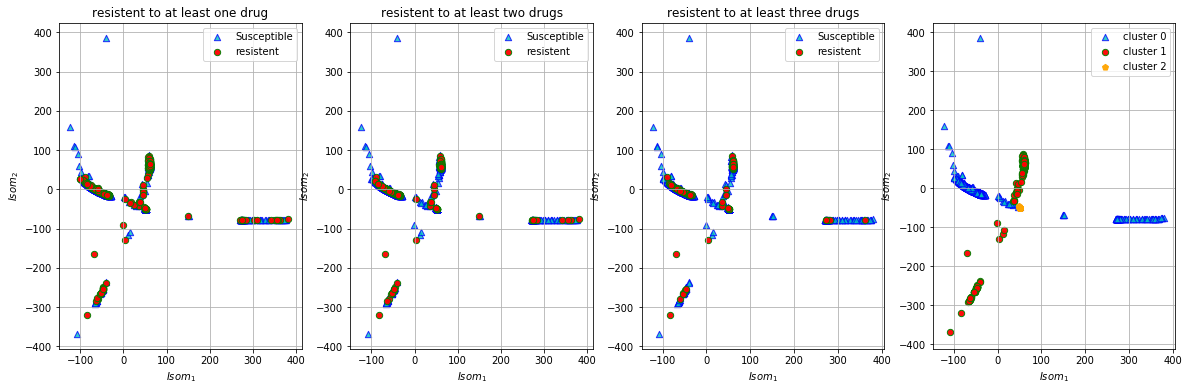

In [26]:

pca=Isomap(n_components=2,n_neighbors=30)
newData=pca.fit_transform(new_df)
fig = plt.figure(figsize=(20,6))
ax1, ax2,ax3,ax4 = fig.subplots(1, 4)
ax1.scatter(newData[target['ny']==0,0], newData[target['ny']==0,1], label='Susceptible',
marker='^', color='c', edgecolors='b', alpha=0.80, s=40,)
ax1.scatter(newData[target['ny']==1,0], newData[target['ny']==1,1], label='resistent',
marker='o', color='r', edgecolors='g',alpha=0.95, s=40)
ax1.set_xlabel('$Isom_{1}$')
ax1.set_ylabel('$Isom_{2}$')

ax1.set_title('resistent to at least one drug')

ax2.scatter(newData[target['serious']==0,0], newData[target['serious']==0,1], label='Susceptible',
marker='^', color='c', edgecolors='b', alpha=0.80, s=40,)
ax2.scatter(newData[target['serious']==1,0], newData[target['serious']==1,1], label='resistent',
marker='o', color='r', edgecolors='g',alpha=0.95, s=40)
ax2.set_xlabel('$Isom_{1}$')
ax2.set_ylabel('$Isom_{2}$')

ax2.set_title('resistent to at least two drugs')

ax3.scatter(newData[target['morethan3']==0,0], newData[target['morethan3']==0,1], label='Susceptible',
marker='^', color='c', edgecolors='b', alpha=0.80, s=40,)
ax3.scatter(newData[target['morethan3']==1,0], newData[target['morethan3']==1,1], label='resistent',
marker='o', color='r', edgecolors='g',alpha=0.95, s=40)
ax3.set_xlabel('$Isom_{1}$')
ax3.set_ylabel('$Isom_{2}$')

ax3.set_title('resistent to at least three drugs')

ax4.scatter(newData[cluster==0,0], newData[cluster==0,1], label='cluster 0',
marker='^', color='c', edgecolors='b', alpha=0.80, s=40,)
ax4.scatter(newData[cluster==1,0], newData[cluster==1,1], label='cluster 1',
marker='o', color='r', edgecolors='g',alpha=0.95, s=40)
ax4.scatter(newData[cluster==2,0], newData[cluster==2,1], label='cluster 2',
marker='p', color='orange', alpha=0.95, s=40)
ax4.set_xlabel('$Isom_{1}$')
ax4.set_ylabel('$Isom_{2}$')
ax1.grid(True)
ax2.grid(True)
ax3.grid(True)
ax4.grid(True)
ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()

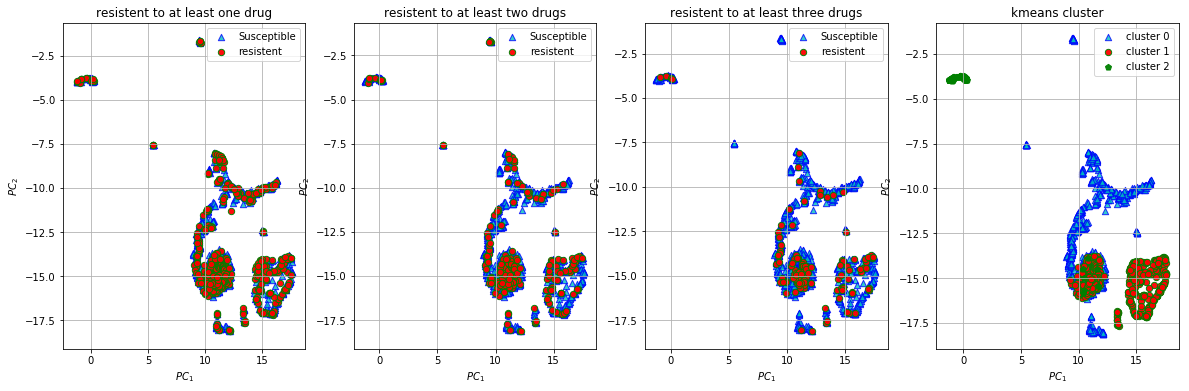

In [28]:

pca=umap.UMAP(n_neighbors=30,min_dist=0.1)
newData=pca.fit_transform(new_df)
fig = plt.figure(figsize=(20,6))
ax1, ax2,ax3 ,ax4= fig.subplots(1, 4)
ax1.scatter(newData[target['ny']==0,0], newData[target['ny']==0,1], label='Susceptible',
marker='^', color='c', edgecolors='b', alpha=0.80, s=40,)
ax1.scatter(newData[target['ny']==1,0], newData[target['ny']==1,1], label='resistent',
marker='o', color='r', edgecolors='g',alpha=0.95, s=40)
ax1.set_xlabel('$PC_{1}$')
ax1.set_ylabel('$PC_{2}$')

ax1.set_title('resistent to at least one drug')

ax2.scatter(newData[target['serious']==0,0], newData[target['serious']==0,1], label='Susceptible',
marker='^', color='c', edgecolors='b', alpha=0.80, s=40,)
ax2.scatter(newData[target['serious']==1,0], newData[target['serious']==1,1], label='resistent',
marker='o', color='r', edgecolors='g',alpha=0.95, s=40)
ax2.set_xlabel('$PC_{1}$')
ax2.set_ylabel('$PC_{2}$')

ax2.set_title('resistent to at least two drugs')

ax3.scatter(newData[target['morethan3']==0,0], newData[target['morethan3']==0,1], label='Susceptible',
marker='^', color='c', edgecolors='b', alpha=0.80, s=40,)
ax3.scatter(newData[target['morethan3']==1,0], newData[target['morethan3']==1,1], label='resistent',
marker='o', color='r', edgecolors='g',alpha=0.95, s=40)
ax3.set_xlabel('$PC_{1}$')
ax3.set_ylabel('$PC_{2}$')



ax3.set_title('resistent to at least three drugs')
ax4.scatter(newData[cluster==0,0], newData[cluster==0,1], label='cluster 0',
marker='^', color='c', edgecolors='b', alpha=0.80, s=40,)
ax4.scatter(newData[cluster==1,0], newData[cluster==1,1], label='cluster 1',
marker='o', color='r', edgecolors='g',alpha=0.95, s=40)
ax4.scatter(newData[cluster==2,0], newData[cluster==2,1], label='cluster 2',
marker='p', color='g', alpha=0.95, s=40)
ax4.set_xlabel('$PC_{1}$')
ax4.set_ylabel('$PC_{2}$')

ax4.set_title('kmeans cluster')
ax1.grid(True)
ax2.grid(True)
ax3.grid(True)
ax4.grid(True)
ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()

NameError: name 'MiniBatchKMeans' is not defined